#                      MINI PROJECT 1 : LÉO SACI

### LINEAR CLASSIFIER #############################

The architecture of my linear classifier is a defined by a unique layer of size $3$, with a softmax activation function at the output, in order to classify the images of the dataset into $3$ categories (triangle, rectangle and disk). The loss function used here is the categorical crossentropy, and the optimizer is adam (withe a learning rate equals to $0.001$), which gives faster train loss decrease than the SGD optimizer.

In [2]:
############################ LINEAR CLASSIFIER #############################

from mp1 import generate_dataset_classification,generate_test_set_classification,visualize_prediction
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical


### Definition of the optimizer
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
###

### Data generate ###
[X_train, Y_train] = generate_dataset_classification(300, 20)
Y_train = to_categorical(Y_train,num_classes=3)
###

### Linear classifier implementation ###
linear_classifier = Sequential()
linear_classifier.add(Dense(3, input_shape=(5184,)))
linear_classifier.add(Activation('softmax'))
###

### Compiler ###
linear_classifier.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
linear_classifier.fit(X_train, Y_train, epochs=40, batch_size=32)

Creating data:
0
100
200
Epoch 1/40
300/300 [==============================] - 1s 2ms/step - loss: 1.9287 - acc: 0.3667
Epoch 2/40
300/300 [==============================] - 0s 166us/step - loss: 0.9993 - acc: 0.4767
Epoch 3/40
300/300 [==============================] - 0s 154us/step - loss: 0.8549 - acc: 0.6700
Epoch 4/40
300/300 [==============================] - 0s 129us/step - loss: 0.6817 - acc: 0.7367
Epoch 5/40
300/300 [==============================] - 0s 130us/step - loss: 0.3965 - acc: 0.8133
Epoch 6/40
300/300 [==============================] - 0s 132us/step - loss: 0.3765 - acc: 0.8300
Epoch 7/40
300/300 [==============================] - 0s 126us/step - loss: 0.3013 - acc: 0.8667
Epoch 8/40
300/300 [==============================] - 0s 125us/step - loss: 0.2483 - acc: 0.9300
Epoch 9/40
300/300 [==============================] - 0s 141us/step - loss: 0.2131 - acc: 0.9567
Epoch 10/40
300/300 [==============================] - 0s 128us/step - loss: 0.2039 - acc: 0.9367
Epoch 

### LINEAR CLASSIFIER CHECKING #######

I checked my linear classifier with the code below.

In [122]:
###### LINEAR CLASSIFIER CHECKING #######

from mp1 import generate_a_disk, generate_a_rectangle, generate_a_triangle
import numpy

l_choice = [['disk',0],['rectangle',1],['triangle',2]]
k = numpy.random.choice([0,1,2])
[char,i] = l_choice[k]

X_test = [generate_a_disk, generate_a_rectangle, generate_a_triangle][i]()
if i==2:
    X_test = X_test[0].reshape(1, X_test[0].shape[0])
else:
    X_test = X_test.reshape(1, X_test.shape[0])
    
print('Input : '+str(char)  )
print('Output : '+str(linear_classifier.predict(X_test)[0]))



Input : triangle
Output : [0. 0. 1.]


### WEIGHTS VISUALIZATION ##########

The code below returns a visualization of the weights computed during the training.
One may recognize on theses images the differents geometric shapes.

Text(0.5, 1.0, 'triangle')

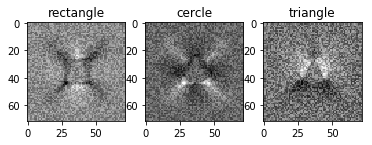

In [4]:
######## WEIGHTS VISUALIZATION ##########

import matplotlib.pyplot as plt


f,(ax1,ax2,ax3) = plt.subplots(1,3,sharex=True)
model_weights = linear_classifier.get_weights()
im0 = model_weights[0][:,0].reshape((72,72))
im1 = model_weights[0][:,1].reshape((72,72))
im2 = model_weights[0][:,2].reshape((72,72))

ax1.imshow(im0, cmap='gray')
ax1.set_title('rectangle')
ax2.imshow(im1, cmap='gray')
ax2.set_title('cercle')
ax3.imshow(im2, cmap='gray')
ax3.set_title('triangle')


### LINEAR CLASSIFIER ON MOVING SHAPES AND MOVING DIMENSIONS DATA ##########

From now on, we allow the shapes to move and change dimensions. To tackle this more difficult classification problem, a simple linear layer is not efficient any more.
Therefore, one needs to train a "deep" network.

In the code cell below, I tried to classify the new data with the simple one-layer classifier in order to highligth the bad performances of this one in this problem. Indeed, we only reach here an accuracy of about $70\%$ on the training set (compared to $100\%$ in the precedent problem).

The nex train set is generated setting the free_location argument to True, in the generate_dataset_classification function.

In [123]:
######## LINEAR CLASSIFIER ON MOVING SHAPES AND MOVING DIMENSIONS DATA ##########

from mp1 import generate_dataset_classification,generate_test_set_classification,visualize_prediction
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical


### Definition of the optimizer
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
###

### Moving shapes and dimensions data generate ###
[X_train, Y_train] = generate_dataset_classification(300, 20, free_location = True)
Y_train = to_categorical(Y_train,num_classes=3)
###

### Linear classifier implementation ###
linear_classifier = Sequential()
linear_classifier.add(Dense(3, input_shape=(5184,)))
linear_classifier.add(Activation('softmax'))
###

### Compiler ###
linear_classifier.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
linear_classifier.fit(X_train, Y_train, epochs=40, batch_size=32)




Creating data:
0
100
200
Epoch 1/40
300/300 [==============================] - 0s 2ms/step - loss: 2.5886 - acc: 0.3167
Epoch 2/40
300/300 [==============================] - 0s 167us/step - loss: 1.7709 - acc: 0.3567
Epoch 3/40
300/300 [==============================] - 0s 128us/step - loss: 1.2160 - acc: 0.4667
Epoch 4/40
300/300 [==============================] - 0s 160us/step - loss: 1.1221 - acc: 0.4033
Epoch 5/40
300/300 [==============================] - 0s 148us/step - loss: 1.0312 - acc: 0.4633
Epoch 6/40
300/300 [==============================] - 0s 155us/step - loss: 0.9474 - acc: 0.4900
Epoch 7/40
300/300 [==============================] - 0s 156us/step - loss: 0.9439 - acc: 0.4767
Epoch 8/40
300/300 [==============================] - 0s 159us/step - loss: 0.8309 - acc: 0.6000
Epoch 9/40
300/300 [==============================] - 0s 160us/step - loss: 0.8566 - acc: 0.5600
Epoch 10/40
300/300 [==============================] - 0s 156us/step - loss: 0.8664 - acc: 0.5433
Epoch 

### ONE LAYER CONVOLUTIONAL NETWORK ##########

In order to improve the classification accuracy, one may use a more complex architecture.
I trained below a CNN with one convolutional layer ($16$ convolutions with kernel size $5\times 5$), and one linear layer of size $3$. We keep the softmax activation at the output to classify the data.

Futhermore, I increased the size of the dataset (from $300$ images to $2000$) to avoid overfitting.
With the ADAM optimizer, I reach an accuracy of $99.6\%$ in $30$ epochs on the training set.
This is better than with the SGD optimizer, which gives $88\%$ of accuracy on the same training set and with the same number of epochs ($30$).
Indeed, ADAM optimizer enables a faster minimization of the loss than SGD (ADAM reach an accuracy of $89\%$ after only 6 epochs).






In [127]:
########## ONE LAYER CONVOLUTIONAL NETWORK ##########

from mp1 import generate_dataset_classification,generate_test_set_classification,visualize_prediction
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical


### Definition of the optimizer
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
###

### Moving shapes and dimensions data generate ###
[X_train, Y_train] = generate_dataset_classification(2000, 20, True)
X_train = X_train.reshape(X_train.shape[0], 72, 72,1)
Y_train = to_categorical(Y_train,num_classes=3)
###

### One layer CNN implementation ###
convnet = Sequential()
convnet.add(Conv2D(16, (5,5), activation='relu',input_shape=(72, 72, 1)))
convnet.add(MaxPooling2D(pool_size=(2, 2)))
convnet.add(Flatten())
convnet.add(Dense(3 ,activation = 'softmax'))
###

### Compiler ###
convnet.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
convnet.fit(X_train, Y_train, epochs=30, batch_size=32)



Epoch 1/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.9529 - acc: 0.5725
Epoch 2/30
2000/2000 [==============================] - 1s 732us/step - loss: 0.6223 - acc: 0.7630
Epoch 3/30
2000/2000 [==============================] - 1s 730us/step - loss: 0.5518 - acc: 0.7850
Epoch 4/30
2000/2000 [==============================] - 2s 770us/step - loss: 0.4671 - acc: 0.8355
Epoch 5/30
2000/2000 [==============================] - 2s 758us/step - loss: 0.4114 - acc: 0.8600
Epoch 6/30
2000/2000 [==============================] - 1s 735us/step - loss: 0.3539 - acc: 0.8930
Epoch 7/30
2000/2000 [==============================] - 2s 762us/step - loss: 0.3026 - acc: 0.9130
Epoch 8/30
2000/2000 [==============================] - 2s 784us/step - loss: 0.2955 - acc: 0.9140
Epoch 9/30
2000/2000 [==============================] - 2s 768us/step - loss: 0.2672 - acc: 0.9295
Epoch 10/30
2000/2000 [==============================] - 2s 815us/step - loss: 0.2236 - acc: 0.9405
Epoch 11/30

### CNN CLASSIFIER EVALUATION #######################

Performances of the previous CNN are checked thanks to the code cell right below.
The function generate_test_set_classification generate a test set (with moving shapes) of size $300$.
We get approximately $93\%$ of accuracy on this test.


In [129]:
############################### CNN CLASSIFIER EVALUATION ########################

from mp1 import generate_test_set_classification


### Test set generate ###
[X_test, Y_test] = generate_test_set_classification()
X_test = X_test.reshape(X_test.shape[0], 72, 72,1)
###

convnet.evaluate(X_test, Y_test)

Creating data:
0
100
200
300/300 [==============================] - 0s 216us/step


[0.22070831537246705, 0.9299999992052714]

### REGRESSION PROBLEM ################

The aim is now to predict the locations of the vertices of a triangle, which is therefore not a classification problem anymore but a regression problem.
Thus, we do not use anymore a softmax activation function at the output of the network, and we aim to minimize the mean squared loss function.

To tackle this far more complex problem, I used a CNN with the architecture given by :

* $2$ convolutional layers with $64$ convolutional kernels of size 5$\times$5
* $2$ convolutional layers with $128$ convolutional kernels of size 3$\times$3
* $4$ linear layers such that each one is followed by a ReLU activation function
* $1$ linear layer of size $100$ followed by a ReLU activation
* $1$ output layer of size $6$ (justified by the fact that each of the three vertices of a triangle can be caracterized by its two cartesian coordinates)

I used here the ADAM opimizer with a learning rate equals to $0.0004$.
The size of the dataset used here for the training is $4000$.


Before the training, it is necessary to give an order over the 3 vertices of a triangle, by this way the CNN will predict the vertice number $1$ location, the vertice number $2$ location, and the vertice number $3$ location.

Here is my procedure to ordonate the vertices of a given triangle :



$(1)$ Fistly I look for the vetex $V_1$ which has the minimal abscissa

$(2)$ Secondly I look for the vetex $V_2$ which has the maximal abscissa
Then I determine the location of the third vetex $V_3$ with respect to the line joining $V_1$ to $V_2$ :

* if $V_3$ is above this line, I set the order $(V_1,V_2,V_3)$
* otherwise I set the order $(V_1,V_3,V_2)$


This procedure is implemented in the ordonate_vertices function right below.


Training results : with $20$ epochs of training, I reach a loss of $0.0007$.



In [131]:
################## REGRESSION PROBLEM ################


from mp1 import generate_dataset_regression
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
import numpy as np


def ordonate_vertices(Y):
    new_Y = np.zeros((len(Y),6))
    for k in range(len(Y)):
        vertices = [np.array([Y[k][i],Y[k][i+1]]) for i in [0, 2, 4]]
        x_array = np.array([vertice[0] for vertice in vertices])
        ind_1 = np.argmin(x_array)
        ind_2 = np.argmax(x_array)
        x_array[ind_1],x_array[ind_2] = 100,100
        ind_3 = np.argmin(x_array)
        rot_pi_over_2 = np.array([[0,-1],[1,0]])
        scal = (rot_pi_over_2.dot( (vertices[ind_2]-vertices[ind_1]).reshape(2,1) )  ).T.dot((vertices[ind_3]-vertices[ind_1]).reshape(2,1))[0][0]
        if scal<0:
            ind = ind_2
            ind_2 = ind_3
            ind_3 = ind

        new_Y[k][0],new_Y[k][1] = Y[k][2*ind_1],Y[k][2*ind_1+1]
        new_Y[k][2],new_Y[k][3] = Y[k][2*ind_2],Y[k][2*ind_2+1]
        new_Y[k][4],new_Y[k][5] = Y[k][2*ind_3],Y[k][2*ind_3+1]
    return(new_Y)
        

        
    

### Generate data ###
[X_train, Y_train] = generate_dataset_regression(4000, 20)
Y_train_new = ordonate_vertices(Y_train)
X_train = X_train.reshape(X_train.shape[0], 72, 72,1)
###

### Optimizer definition ###
adam = Adam(lr=0.0004, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
###

### Regression implementation
regression_model = Sequential()
regression_model.add(Conv2D(64, (5,5), activation='relu',input_shape=(72, 72, 1),strides = 2))
regression_model.add(Conv2D(64, (5,5), activation='relu',strides = 2))
regression_model.add(Conv2D(128, (3,3), activation='relu',strides = 2))
regression_model.add(Conv2D(128, (3,3), activation='relu', strides = 2))

regression_model.add(Flatten())

regression_model.add(Dense(1000))
regression_model.add(Activation('relu'))

regression_model.add(Dense(1000))
regression_model.add(Activation('relu'))

regression_model.add(Dense(1000))
regression_model.add(Activation('relu'))

regression_model.add(Dense(1000))
regression_model.add(Activation('relu'))

regression_model.add(Dense(100))
regression_model.add(Activation('relu'))


regression_model.add(Dense(6))
###

### Compiler ###
regression_model.compile(loss='mean_squared_error',optimizer=adam)
regression_model.fit(X_train, Y_train_new, epochs=20, batch_size=32)



Creating data:
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
Epoch 1/20
4000/4000 [==============================] - 18s 4ms/step - loss: 0.0492
Epoch 2/20
4000/4000 [==============================] - 16s 4ms/step - loss: 0.0208
Epoch 3/20
4000/4000 [==============================] - 17s 4ms/step - loss: 0.0154
Epoch 4/20
4000/4000 [==============================] - 16s 4ms/step - loss: 0.0117
Epoch 5/20
4000/4000 [==============================] - 16s 4ms/step - loss: 0.0100
Epoch 6/20
4000/4000 [==============================] - 16s 4ms/step - loss: 0.0075
Epoch 7/20
4000/4000 [==============================] - 17s 4ms/step - loss: 0.0069
Epoch 8/20
4000/4000 [==============================] - 16s 4ms/step - loss: 0.0055
Epoch 9/20
4000/4000 [==============================] - 16s 4ms/step - loss: 0.0050
Epoch 10/20
4000/4000 [==================

### REGRESSION MODEL EVALUATION #######################

I tested my CNN for regression in the next code cell on a test set of size $300$.
It returns a loss equals to $0.0077$ over the test.



In [132]:
#################### REGRESSION MODEL EVALUATION #######################

from mp1 import generate_test_set_regression

### Data generate ###
[X_test, Y_test] = generate_test_set_regression()
X_test = X_test.reshape(X_test.shape[0], 72, 72,1)
Y_test_new = ordonate_vertices(Y_test)
###

regression_model.evaluate(X_test, Y_test_new)

Creating data:
0
100
200
300/300 [==============================] - 1s 2ms/step


0.0077238633545736474

### VISUALIZATION OF THE PREDICTED TRIANGLES ##########################

In the next cell is implemented a function vienabling the visualization of $6$ predicted triangles, choosed randomly in the test set.


[163 250 265 100 174  19]


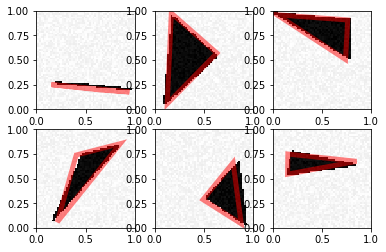

In [137]:
######################### VISUALIZATION OF THE PREDICTED TRIANGLES ##########################

import matplotlib.patches as patches
import numpy.random as rd
import matplotlib.pyplot as plt

Y = regression_model.predict(X_test)

def visualize_predictions(X,Y):
    rand_ind = rd.randint(0,len(Y),6)
    print(rand_ind)
    IMAGE_SIZE = 72
    (f, ((ax1, ax2,ax3),(ax4,ax5,ax6))) = plt.subplots(2,3)
    tab_ax = [ax1,ax2,ax3,ax4,ax5,ax6]
    
    for i in range(len(tab_ax)):
        l = []
        l.append(np.min([Y_test[rand_ind[i]][0],Y_test[rand_ind[i]][2]]))
        l.append(np.min([ np.max([Y_test[rand_ind[i]][0],Y_test[rand_ind[i]][2]]) ,Y_test[rand_ind[i]][4]]))
        ax = tab_ax[i]
        x,y = X[rand_ind[i]].reshape(72,72), Y[rand_ind[i]]
        I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
        ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
        ax.set_xlim([0,1])
        ax.set_ylim([0,1])
        xy = y.reshape(3,2)
        tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
        ax.add_patch(tri)


visualize_predictions(X_test,Y)
        
    
    
    



### IMAGE DENOISING###

Functions to generate data are coded right below as generate_a_rectangle2, generate_a_disk2, generate_a_triangle2, and generate_dataset. The train set is choosen of size $1000$.
I used a Hourglass Network with an Adam optimizer. The learning rate is choosen equal to $0.004$.

Creating data:
0
100
200
300
400
500
600
700
800
900


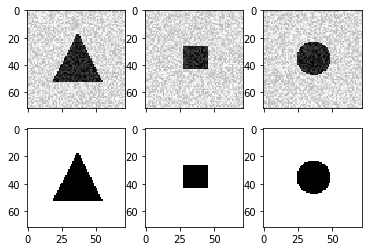

In [41]:
####################### DATA GENERATION #########################

import matplotlib.pyplot as plt
import numpy as np
from mp1 import generate_a_drawing
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout,UpSampling2D
from keras.optimizers import SGD, Adam

IMAGE_SIZE = 72

def generate_a_rectangle2(noise=1, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise), generate_a_drawing(figsize, U, V, 0)


def generate_a_disk2(noise=1, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise), generate_a_drawing(figsize, U, V, 0)

def generate_a_triangle2(noise=1, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, 0)
    imdata_noisy = generate_a_drawing(figsize, U, V, noise)
    return [imdata_noisy, [U[0], V[0], U[1], V[1], U[2], V[2]]], [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


(f, ((ax1, ax2,ax3),(ax4,ax5,ax6))) = plt.subplots(2,3,sharex=True)
[im1, v1],[im2, v2] = generate_a_triangle2(100)
im3,im4 = generate_a_rectangle2(100)
im5,im6 = generate_a_disk2(100)


ax1.imshow(im1.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax2.imshow(im3.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax3.imshow(im5.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax4.imshow(im2.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax5.imshow(im4.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax6.imshow(im6.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

def generate_dataset(nb_samples, noise=100.0, free_location=False):
    im_size = generate_a_rectangle2()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 100 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i],Y[i] = generate_a_rectangle2(noise, free_location)
        elif category == 1: 
            X[i],Y[i] = generate_a_disk2(noise, free_location)
        else:
            [X[i], V1],[Y[i],V2] = generate_a_triangle2(noise, free_location)
    return [X, Y]

### Generate data
[X_train, Y_train] = generate_dataset(1000)
X_train = X_train.reshape(X_train.shape[0], 72, 72,1)/255
Y_train = Y_train.reshape(Y_train.shape[0], 72, 72,1)/255
###


In [46]:
################################# IMAGE DENOISING--TRAINING ###############################

### Optimizer definition ###
adam = Adam(lr=0.0004, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
###

### Hourglass network
hourglass_net = Sequential()

hourglass_net.add(Conv2D(32, kernel_size = 3, activation = 'relu',input_shape=(72, 72, 1)))
hourglass_net.add(MaxPooling2D(pool_size=(2, 2)))
hourglass_net.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
hourglass_net.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
hourglass_net.add(MaxPooling2D(pool_size=(2, 2)))

hourglass_net.add(UpSampling2D(size = (2,2)))
hourglass_net.add(Conv2D(128, kernel_size = 2, activation = 'relu'))
hourglass_net.add(Conv2D(128, kernel_size = 3, activation = 'relu'))
hourglass_net.add(Conv2D(128, kernel_size = 3, activation = 'relu'))
hourglass_net.add(Conv2D(128, kernel_size = 3, activation = 'relu'))

hourglass_net.add(UpSampling2D(size = (2,2)))
hourglass_net.add(Conv2D(64, kernel_size = 2, activation = 'relu'))
hourglass_net.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
hourglass_net.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
hourglass_net.add(Conv2D(64, kernel_size = 3, activation = 'relu'))

hourglass_net.add(UpSampling2D(size = (2,2)))
hourglass_net.add(Conv2D(32, kernel_size = 2, activation = 'relu'))
hourglass_net.add(Conv2D(32, kernel_size = 3, activation = 'relu'))
hourglass_net.add(Conv2D(32, kernel_size = 4, activation = 'relu'))
hourglass_net.add(Conv2D(1, kernel_size = 1, activation = 'sigmoid'))


### Hourglass training
hourglass_net.compile(loss='mean_squared_error',optimizer=adam)
hourglass_net.fit(X_train, Y_train, epochs=25, batch_size=32)

Epoch 1/25
1000/1000 [==============================] - 43s 43ms/step - loss: 0.1473
Epoch 2/25
1000/1000 [==============================] - 39s 39ms/step - loss: 0.0959
Epoch 3/25
1000/1000 [==============================] - 39s 39ms/step - loss: 0.0737
Epoch 4/25
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0567
Epoch 5/25
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0514
Epoch 6/25
1000/1000 [==============================] - 39s 39ms/step - loss: 0.0443
Epoch 7/25
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0408
Epoch 8/25
1000/1000 [==============================] - 39s 39ms/step - loss: 0.0331
Epoch 9/25
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0336
Epoch 10/25
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0311
Epoch 11/25
1000/1000 [==============================] - 39s 39ms/step - loss: 0.0277
Epoch 12/25
1000/1000 [==============================] - 39s 39

In [50]:
################################# IMAGE DENOISING--TESTING ###############################

### Generate the test set
[X_test, Y_test] = generate_dataset(300)
X_test = X_test.reshape(X_test.shape[0], 72, 72,1)/255
Y_test = Y_test.reshape(Y_test.shape[0], 72, 72,1)/255
###


hourglass_net.evaluate(X_test, Y_test)
predictions = hourglass_net.predict(X_test)

Creating data:
0
100
200
300/300 [==============================] - 3s 11ms/step


### DENOISING : VISUALIZATION OF PREDICTIONS

In the cell below are shown some denoised images, predicted by the Hourglass Network.

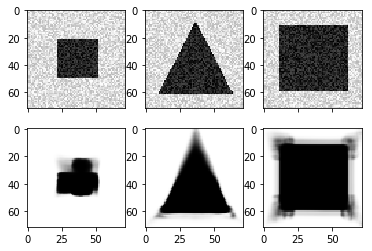

In [49]:
################# VISUALIZATION OF PREDICTIONS #########################

(f, ((ax1, ax2,ax3),(ax4,ax5,ax6))) = plt.subplots(2,3,sharex=True)


im1 = X_test[0]*255
im2 = X_test[1]*255
im3 = X_test[2]*255

im4 = predictions[0]*255
im5 = predictions[1]*255
im6 = predictions[2]*255


ax1.imshow(im1.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax2.imshow(im2.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax3.imshow(im3.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax4.imshow(im4.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax5.imshow(im5.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax6.imshow(im6.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')